In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# 1. Introdução
Datasets desbalanceados são comuns em cenários do mundo real, especialmente em tarefas de classificação. Um dataset é considerado desbalanceado quando uma classe tem significativamente mais amostras do que a outra. Isso pode levar a modelos que têm um desempenho muito bom na classe majoritária, mas não tão bom na classe minoritária.

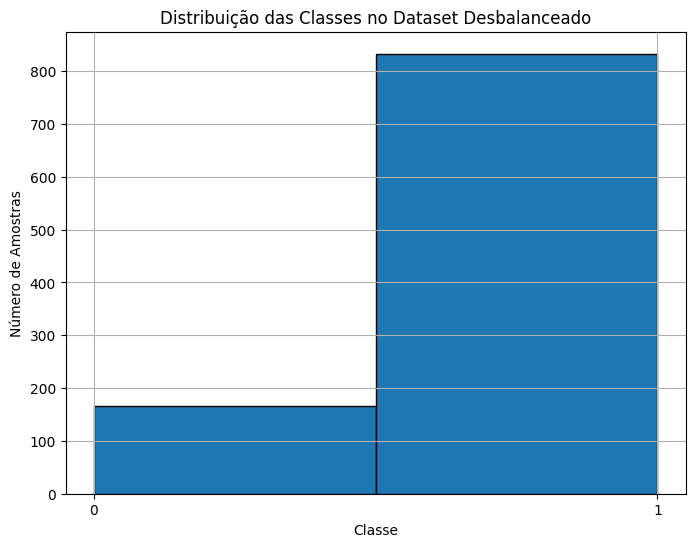

In [26]:
# Criar um dataset sintético desbalanceado
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.01, 0.99],
                           n_informative=2, n_redundant=0, flip_y=0.3,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Visualizar a distribuição das classes
plt.figure(figsize=(8, 6))
plt.hist(y, bins=2, edgecolor='black')
plt.title('Distribuição das Classes no Dataset Desbalanceado')
plt.xlabel('Classe')
plt.ylabel('Número de Amostras')
plt.xticks([0, 1])
plt.grid(True)
plt.show()

In [27]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo de regressão logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = logreg.predict(X_test)

# Gerar o relatório de classificação
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      0.02      0.04        51
           1       0.83      1.00      0.91       249

    accuracy                           0.83       300
   macro avg       0.92      0.51      0.47       300
weighted avg       0.86      0.83      0.76       300



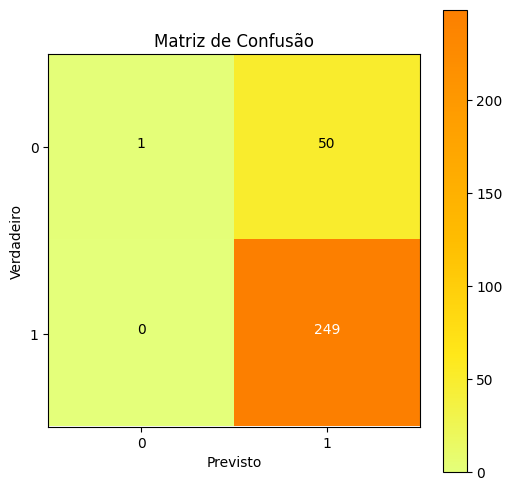

In [28]:
import itertools
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionando valores aos quadrados
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, conf_matrix[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.grid(False)
plt.show()


## Definindo pesos para as classificações

Ao realizar a classificação, podemos dar "pesos" diferentes a cada uma das classes previstas

### A biblioteca scikit-learn permite fazer isso facilmente através do parâmetro class_weight na regressão logística.
#### O parâmetro class_weight pode ser ajustado para:
#### •	"balanced": ajusta automaticamente os pesos das classes de forma inversamente proporcional às frequências das classes no conjunto de entrada.

In [32]:
# Treinar um modelo de regressão logística com pesos de classe balanceados
logreg_weighted = LogisticRegression(class_weight='balanced', random_state=42)
logreg_weighted.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_weighted = logreg_weighted.predict(X_test)

# Gerar o relatório de classificação
class_report_weighted = classification_report(y_test, y_pred_weighted)
print(class_report_weighted)


              precision    recall  f1-score   support

           0       0.16      0.43      0.23        51
           1       0.82      0.54      0.65       249

    accuracy                           0.52       300
   macro avg       0.49      0.48      0.44       300
weighted avg       0.71      0.52      0.58       300



#### •	{class_label: weight}: especifica explicitamente os pesos de classe manualmente para cada classe. Isso pode ser útil para conjuntos de dados desequilibrados.

In [36]:
# Considerando que a classe 0 "vale" cinco vezes mais que a classe 1
class_weight={0: 5, 1: 1}

# Treinar um modelo de regressão logística com pesos de classe balanceados
logreg_weighted = LogisticRegression(class_weight=class_weight, random_state=42)
logreg_weighted.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_weighted = logreg_weighted.predict(X_test)

# Gerar o relatório de classificação
class_report_weighted = classification_report(y_test, y_pred_weighted)
print(class_report_weighted)


              precision    recall  f1-score   support

           0       0.17      0.43      0.24        51
           1       0.83      0.55      0.66       249

    accuracy                           0.53       300
   macro avg       0.50      0.49      0.45       300
weighted avg       0.71      0.53      0.59       300



O uso de pesos de classe é uma técnica poderosa, especialmente quando você tem um entendimento claro dos trade-offs entre precisão e recall para cada classe. Também permite ajustar manualmente os pesos com base na importância relativa de cada classe para a aplicação em questão.

## Oversampling / Undersampling - Ex: SMOTE e Biblioteca Imbalanced-learn

Não usar. Não é uma boa prática.